In [3]:
# data handling
import pandas as pd
import numpy as np


In [4]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Load dataset
df = pd.read_csv('heart_disease_prediction.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis (EDA)

In this section, we will explore the dataset using summary statistics and visualizations.  
We aim to identify data distributions, relationships, and potential data quality issues.

In [7]:
# View basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Check for missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


### Dataset Overview

Let’s examine the basic structure of the dataset, check for missing values, and understand the feature types.

In [11]:
# Summary statistics
df.describe()

# Check class distribution
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df.columns

## Data Preprocessing

Before training the K-Nearest Neighbors model, we need to:
- Encode categorical features into numerical values
- Scale numerical features (since KNN is distance-based)
- Split the data into training and test sets

In [15]:
# categorical column names list
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


### Feature Scaling

KNN is a distance-based algorithm, so we scale all features using StandardScaler.  
This ensures that each feature contributes equally to distance calculations.

In [18]:
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform
X_scaled = scaler.fit_transform(X)
# Check the result
print("Before scaling (first 5 rows):")
print(X.head())

print("\nAfter scaling (first 5 rows):")
print(X_scaled[:5])

Before scaling (first 5 rows):
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0   40        140          289          0    172      0.0   True   
1   49        160          180          0    156      1.0  False   
2   37        130          283          0     98      0.0   True   
3   48        138          214          0    108      1.5  False   
4   54        150          195          0    122      0.0   True   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0               True              False             False               True   
1              False               True             False               True   
2               True              False             False              False   
3              False              False             False               True   
4              False               True             False               True   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
0          Fal

###Train/Test Split

We split the dataset into training and test sets using an 80/20 ratio.  
This helps us evaluate how well the model performs on unseen data.

In [19]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Check the shape of each split
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (734, 15)
Test features shape: (184, 15)
Training labels shape: (734,)
Test labels shape: (184,)


### Initial Model Training (k=5)

We train a K-Nearest Neighbors (KNN) classifier using "k=5".  
This model will learn from the training data and then predict on the test data.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)
# Predict on the test set
y_pred = knn.predict(X_test)

### Model Evaluation

We evaluate the model using accuracy, confusion matrix, and a classification report.  
These metrics help us understand how well the model is predicting both classes.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8532608695652174

Confusion Matrix:
[[67 10]
 [17 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



### Hyperparameter Tuning: Finding the Best `k`

We loop through different `k` values (from 1 to 20) and track the prediction error.  
The goal is to find the value of `k` that minimizes classification error.


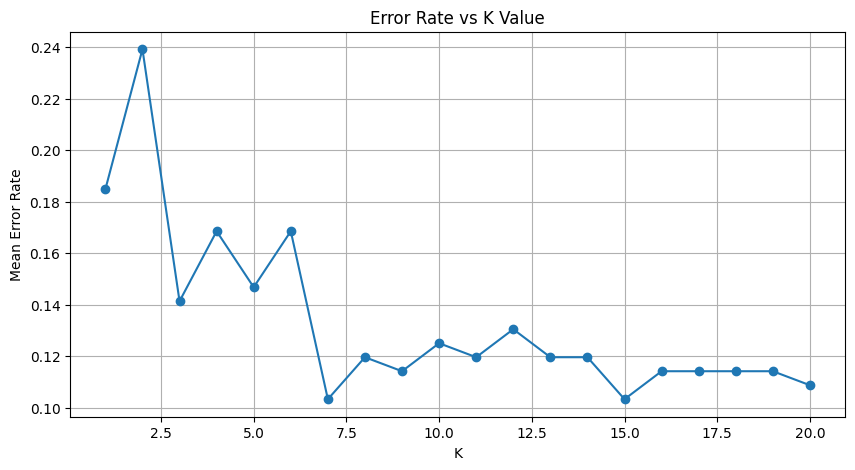

In [23]:
error_rates = []

# Try k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

# Plot error rate vs. k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Mean Error Rate')
plt.grid(True)
plt.show()

Final Model with Optimal `k`

We retrain the KNN model using the `k` value that gave us the lowest error rate.  
This should give us the best performance on unseen data.

In [24]:
# Replace this with your actual best k (e.g., 7 or 9, etc.)
BEST_K = 7  # example only
# Train final model
knn_final = KNeighborsClassifier(n_neighbors=BEST_K)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)
# Evaluate
print("Final Accuracy (k={}):".format(BEST_K), accuracy_score(y_test, y_final_pred))
print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test, y_final_pred))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_final_pred))


Final Accuracy (k=7): 0.8967391304347826

Final Confusion Matrix:
[[68  9]
 [10 97]]

Final Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



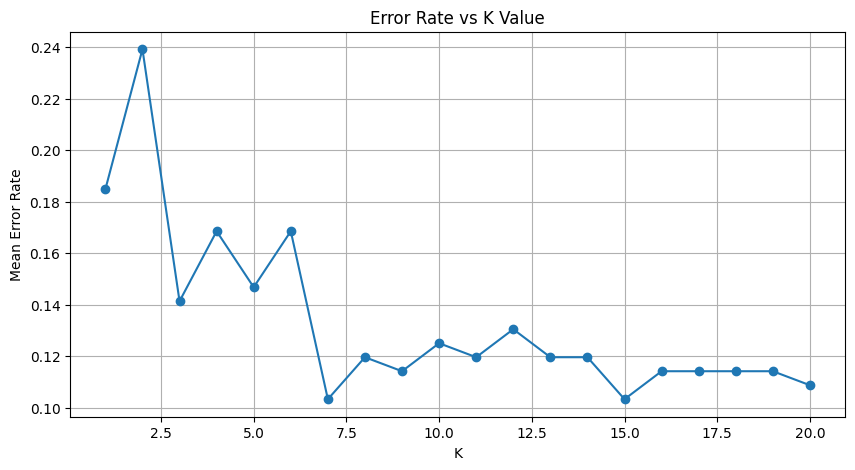

In [25]:
# Re-calculate and plot error rates for k = 1 to 20
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)
# Plot the error rate for each k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Mean Error Rate')
plt.grid(True)
plt.show()


## Conclusion

In this project, we built a machine learning model to predict the presence of heart disease using patient health records.  
We used the K-Nearest Neighbors (KNN) algorithm, which classifies a data point based on the majority vote of its neighbors.

After cleaning the data, encoding categorical features, scaling numerical features, and splitting the dataset, we trained and evaluated a KNN model.

We tuned the `k` hyperparameter to find the optimal value, and observed how model accuracy and error rate changed with different `k` values.


## Key Takeaways

- KNN is a simple yet effective model for classification problems.
- Feature scaling is **critical** for distance-based algorithms like KNN.
- The dataset was relatively well-balanced, so accuracy was a useful metric.
- Hyperparameter tuning (like choosing the best `k`) can significantly improve model performance.

---

## What I Learned

- How to preprocess data for machine learning
- How to encode categorical variables using one-hot encoding
- Why and how to scale numerical features
- How to train and evaluate a KNN model using scikit-learn
- How to interpret a confusion matrix and classification report
- How to tune a hyperparameter (`k`) using error rate plots

---

## Next Steps

To further improve or expand this project, I could:
- Try other classification algorithms (e.g., Logistic Regression, Random Forest)
- Use cross-validation instead of a single train-test split
- Deploy the model using a simple web app (like Streamlit or Flask)

